### The Goal of Experimental Design

The purpose of a formal experiment is to move from informal observations to robust, quantifiable conclusions about cause and effect. It provides an objective and controlled way to test a specific hypothesis. Instead of a vague statement like "X probably affected Y," a well-designed experiment combined with statistical analysis allows for a precise conclusion, such as:

> "The evidence indicates that X had a statistically significant effect on Y, with a 5% risk of a Type I error (a false positive)."

This level of rigor is essential in fields ranging from medical research and product analytics to marketing and government policy.

#### Core Terminology

  * **Subjects**: The entities on which the experiment is performed (e.g., users, patients, employees, plots of land).
  * **Treatment Group**: The group of subjects that receives the specific change or intervention being tested.
  * **Control Group**: The group of subjects that does not receive the treatment. This group serves as a baseline for comparison, showing what would have happened without the intervention.

### The Critical Role of Random Assignment

The validity of an experiment's conclusion rests almost entirely on how subjects are assigned to the treatment and control groups. The goal is to create two groups that are as similar as possible in every respect *before* the treatment is applied.

#### The Flaw of Non-random Assignment

A common but incorrect approach is to assign subjects non-randomly, for example, by splitting a list of users in half. This method is highly susceptible to **selection bias**. If there is any underlying order in the data (e.g., users are sorted by their sign-up date or activity level), the two groups will be systematically different from the start. Any observed difference in the outcome could be due to this pre-existing difference, not the treatment, making the experiment's results invalid.

```python
import pandas as pd
import numpy as np

# Create a generic dataset of 200 subjects, sorted by a baseline metric
# This simulates a non-random ordering
np.random.seed(42)
subjects = pd.DataFrame({
    'id': np.arange(200),
    'baseline_metric': np.sort(np.random.normal(loc=100, scale=10, size=200))
})

# Non-random assignment by slicing the DataFrame
group1_nonrandom = subjects.iloc[0:100]
group2_nonrandom = subjects.iloc[100:]

# Compare the baseline metric for the two groups
print("Group 1 Mean:", group1_nonrandom['baseline_metric'].mean())
print("Group 2 Mean:", group2_nonrandom['baseline_metric'].mean())
```

The means are significantly different *before* any treatment is applied. An experiment conducted on these groups would be fundamentally flawed.

#### The Solution: Random Assignment

**Random assignment** is the cornerstone of experimental design. By randomly assigning each subject to either the treatment or control group, we ensure that, on average, any pre-existing characteristics (both known and unknown) are distributed equally between the two groups. This isolates the treatment as the only systematic difference, allowing us to confidently attribute any observed change in the outcome to the treatment itself.

In pandas, this can be achieved using the `.sample()` method.

```python
# Random assignment using .sample() 
# Randomly select 50% of subjects for Group 1
group1_random = subjects.sample(frac=0.5, random_state=42)
# The remaining subjects go into Group 2
group2_random = subjects.drop(group1_random.index)

# Compare the baseline metric for the two randomly assigned groups
print("Group 1 Mean:", group1_random['baseline_metric'].mean())
print("Group 2 Mean:", group2_random['baseline_metric'].mean())
```

With random assignment, the baseline means of the two groups are now nearly identical. This creates a fair and unbiased starting point for the experiment, ensuring that any significant difference observed after the treatment can be attributed to the treatment itself.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
url = "https://raw.githubusercontent.com/jhlopesalves/data-science-practice-notebook/refs/heads/main/Python/statistics/experimental_design/data/weights.csv"
weights = pd.read_csv(url, usecols=lambda col: not col.startswith("Unnamed"))

In [3]:
# Select the first 250 rows for group 1 (non-random assignment)
group1_non_rand = weights.iloc[0:250]

# Select the remaining rows for group 2 (non-random assignment)
group2_non_rand = weights.iloc[250:]

# Concatenate descriptive statistics of both groups for comparison
compare_df_non_rand = pd.concat(
    [group1_non_rand["weight"].describe(), group2_non_rand["weight"].describe()], axis=1
)

display(compare_df_non_rand)

,weight,weight
count,250.000000,250.000000
mean,58.821560,71.287480
std,4.503791,5.019958
min,39.070000,65.100000
25%,56.200000,67.490000
50%,59.390000,70.115000
75%,62.527500,73.770000
max,65.100000,95.820000


In [4]:
# Randomly sample 50% of the data without replacement for group 1
group1_random = weights.sample(frac=0.5, random_state=42, replace=False)

# Assign the remaining data to group 2 by dropping group 1 indices
group2_random = weights.drop(group1_random.index)

# Combine descriptive statistics of both groups into a single DataFrame for comparison
compare_df_random = pd.concat(
    [group1_random["weight"].describe(), group2_random["weight"].describe()], axis=1
)

# Rename columns to reflect group names for clarity
compare_df_random.columns = ["group1", "group2"]

display(compare_df_random)

,group1,group2
count,250.000000,250.000000
mean,64.499960,65.609080
std,8.073025,7.596346
min,39.070000,44.040000
25%,58.660000,60.312500
50%,64.620000,65.540000
75%,69.957500,70.442500
max,86.760000,95.820000


While simple randomization is the foundation of experimental design, it can sometimes result in imbalances between groups by pure chance. Advanced techniques like **block randomization** ensure equal group sizes, while **stratified randomization** ensures that key baseline characteristics (**covariates**) are evenly distributed between the treatment and control groups, which helps to isolate the treatment's true effect.

## The Limitations of Simple Randomization

Simple random assignment is a powerful tool, but it is not without potential issues, especially in smaller experiments:

1.  **Uneven Group Sizes**: When using a method like `df.sample(frac=0.5)`, random chance might lead to slightly different numbers of subjects in the treatment and control groups.
2.  **Covariate Imbalance**: A more critical issue is the potential for an imbalance in **covariates**. A covariate is a baseline variable (like age, location, or user status) that could also influence the outcome of the experiment. If, by chance, one group ends up with a higher proportion of a key covariate, this can become a **confounding variable**, making it difficult to distinguish between the effect of the treatment and the effect of the pre-existing group imbalance.

### Advanced Randomization Techniques

To mitigate these issues, more sophisticated randomization techniques are often employed.

#### Block Randomization

**Block randomization** is a procedure used to ensure that the number of subjects in the treatment and control groups remains equal or very close throughout the subject recruitment process.

  * **Purpose**: To prevent imbalances in group sizes.
  * **How it works**: Subjects are divided into "blocks" of a pre-determined size (e.g., blocks of 4). Within each block, a random half of the subjects are assigned to the treatment group and the other half to the control group. This process is repeated for each new block of subjects.

#### Stratified Randomization

**Stratified randomization** is a technique used to control for potential confounding variables by ensuring that key baseline characteristics are perfectly balanced across the experimental groups.

  * **Purpose**: To eliminate the influence of important covariates.
  * **How it works**:
    1.  First, the population is divided into subgroups, or **strata**, based on the covariate(s) of interest (e.g., one stratum for "power users" and another for "not power users").
    2.  Then, within **each stratum**, a separate simple randomization is performed to assign subjects to the treatment and control groups.

This two-step process guarantees that the proportion of subjects with that characteristic (e.g., the percentage of power users) is identical in both the treatment and control groups.

#### A Complete Example: Simple vs. Stratified Randomization

Let's demonstrate the value of stratified randomization with a complete example.

**Scenario**: We want to test a new website feature (the treatment) to see if it increases `basket_size`. We know that `power_user` status is a strong predictor of `basket_size`, making it a potential confounding variable.

```python
import pandas as pd
import numpy as np

# 1. Create a generic, reproducible dataset
np.random.seed(42)
df = pd.DataFrame({
    'user_id': np.arange(1000),
    'power_user': np.random.choice([0, 1], 1000, p=[0.9, 0.1])
})

# 2. Simple Random Assignment 
# Assign 50% to Treatment ('T') and 50% to Control ('C')
group_T_simple = df.sample(frac=0.5, random_state=42)
group_C_simple = df.drop(group_T_simple.index)
# Check the distribution of the 'power_user' covariate
print("Control Group:\n", group_C_simple['power_user'].value_counts(normalize=True))
print("Treatment Group:\n", group_T_simple['power_user'].value_counts(normalize=True))
# Note: The proportions are close, but not identical, due to random chance.

# 3. Stratified Random Assignment 
# Stratum 1: Not Power Users (power_user == 0)
strata_0 = df[df['power_user'] == 0]
strata_0_T = strata_0.sample(frac=0.5, random_state=42)
strata_0_C = strata_0.drop(strata_0_T.index)

# Stratum 2: Power Users (power_user == 1)
strata_1 = df[df['power_user'] == 1]
strata_1_T = strata_1.sample(frac=0.5, random_state=42)
strata_1_C = strata_1.drop(strata_1_T.index)

# Combine the stratified groups
group_T_stratified = pd.concat([strata_0_T, strata_1_T])
group_C_stratified = pd.concat([strata_0_C, strata_1_C])

# Check the distribution of the 'power_user' covariate again
print("Control Group:\n", group_C_stratified['power_user'].value_counts(normalize=True))
print("Treatment Group:\n", group_T_stratified['power_user'].value_counts(normalize=True))
```

The output demonstrates that with simple randomization, the proportion of power users in the two groups is slightly different due to random chance. With **stratified randomization**, the proportion of power users is **exactly identical** in both the treatment and control groups. This removes the `power_user` status as a potential confounding variable, ensuring that any difference we observe in `basket_size` between the groups can be more confidently attributed to the treatment itself.

In [5]:
# Generate random basket sizes between 0 and 1000 for 1000 users
basket_size = np.random.randint(low=0, high=1001, size=1000)

# Generate base web time (2 to 30 seconds) for all users
base_time = np.random.randint(low=2, high=30, size=1000)

# Calculate the effect of basket size on web time (each $ adds ~0.08 seconds)
size_effect = basket_size * 0.08

# Add random noise (mean=0, std=15) to simulate variability in user behavior
noise = np.random.normal(0, 15, 1000)

# Combine base time, size effect, and noise to compute total web time
web_time = base_time + size_effect + noise

# Clip web time to ensure it stays within realistic bounds (2 to 120 seconds)
web_time = np.clip(web_time, 2, 120).astype(int)

# Create a DataFrame to store basket size and web time
ecom = pd.DataFrame(data={"basket_size": basket_size, "web_time": web_time})

# Mark users as power users (1) if their web time exceeds 40 seconds, else 0
ecom["power_user"] = (ecom["web_time"] > 40).astype(int)

In [6]:
# Randomly sample 50% of the data for group 1, ensuring reproducibility with random_state
group1 = ecom.sample(frac=0.5, random_state=42, replace=False)

# Assign group 1 to Block 1 for stratified analysis
group1["Block"] = 1

# Assign the remaining data to group 2 by dropping group 1 indices
group2 = ecom.drop(group1.index)

# Assign group 2 to Block 2 for stratified analysis
group2["Block"] = 2

print(len(group1), len(group2))

500 500


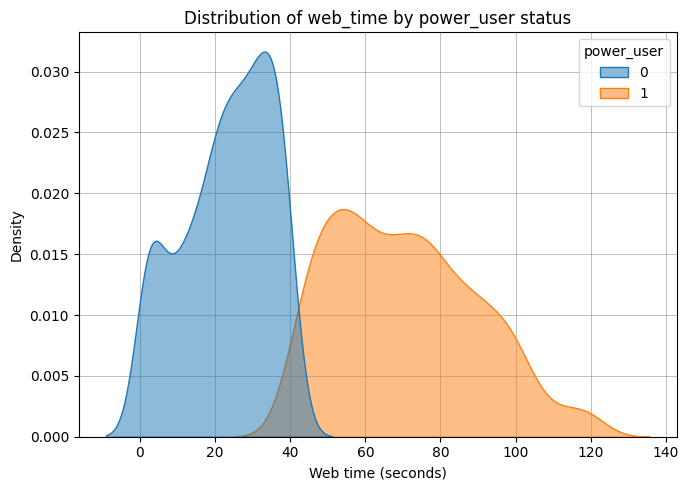

In [7]:
fig, ax = plt.subplots(figsize=(7, 5))

# Plot KDEs of web_time for each power_user group (0 vs 1)
sns.kdeplot(
    data=ecom,
    x="web_time",
    hue="power_user",
    fill=True,
    common_norm=False,
    alpha=0.5,
    ax=ax,
)

ax.set(
    xlabel="Web time (seconds)",
    ylabel="Density",
    title="Distribution of web_time by power_user status",
)
ax.grid(True, alpha=0.6, linewidth=0.6, color="grey")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

In [8]:
# Filter rows where 'power_user' equals 1 and create a copy to avoid SettingWithCopyWarning
strata_1 = ecom.loc[ecom["power_user"] == 1].copy()

# Assign Block 1 to all rows in the filtered DataFrame
strata_1["Block"] = 1

# Randomly sample 50% of the rows for the treatment group (T), ensuring reproducibility
strata_1_g1 = strata_1.sample(frac=0.5, replace=False, random_state=42).copy()
strata_1_g1["T_C"] = "T"  # Mark sampled rows as treatment group

# Assign the remaining rows to the control group (C) by dropping treatment indices
strata_1_g2 = strata_1.drop(strata_1_g1.index).copy()
strata_1_g2["T_C"] = "C"  # Mark remaining rows as control group

In [9]:
# Filter out rows from 'ecom' DataFrame where 'power_user' equals 1 to create strata_2
strata_2 = ecom.drop(strata_1.index)

# Assign Block 2 to all rows in the filtered DataFrame for stratified analysis
strata_2["Block"] = 2

# Randomly sample 50% of the rows for the treatment group (T), ensuring reproducibility
strata_2_g1 = strata_2.sample(frac=0.5, replace=False, random_state=42).copy()

# Mark sampled rows as treatment group
strata_2_g1["T_C"] = "T"

# Assign the remaining rows to the control group (C) by dropping treatment indices
strata_2_g2 = strata_2.drop(strata_2_g1.index).copy()

# Mark remaining rows as control group
strata_2_g2["T_C"] = "C"

In [10]:
# Combine all stratified groups into a single DataFrame for analysis
ecom_stratified = pd.concat([strata_1_g1, strata_1_g2, strata_2_g1, strata_2_g2])

# Group by Block, Treatment/Control (T_C), and power_user, then count occurrences
# This provides a summary of the distribution of users across strata and groups
display(ecom_stratified.groupby(["Block", "T_C", "power_user"]).size())

Block  T_C  power_user
1      C    1             342
       T    1             342
2      C    0             158
       T    0             158
dtype: int64

In [11]:
url = "https://raw.githubusercontent.com/jhlopesalves/data-science-practice-notebook/refs/heads/main/Python/statistics/experimental_design/data/productivity_subjects.csv"
productivity_subjects = pd.read_csv(
    url, usecols=lambda col: not col.startswith("Unnamed")
)
productivity_subjects.head()

,subject_id
0,1
1,2
2,3
3,4
4,5


### Blocking experimental data
You are working with a manufacturing firm that wants to conduct some experiments on worker productivity. Their dataset only contains 100 rows, so it's important that experimental groups are balanced.

This sounds like a great opportunity to use your knowledge of blocking to assist them. They have provided a `productivity_subjects` DataFrame. Split the provided dataset into two even groups of 50 entries each.

In [12]:
block_1 = productivity_subjects.sample(frac=0.5, random_state=42, replace=False)
block_1["block"] = 1

block_2 = productivity_subjects.drop(block_1.index)
block_2["block"] = 2
productivity_combined = pd.concat([block_1, block_2], axis=0)
display(productivity_combined["block"].value_counts())

block
1    50
2    50
Name: count, dtype: int64

In [13]:
url = "https://raw.githubusercontent.com/jhlopesalves/data-science-practice-notebook/refs/heads/main/Python/statistics/experimental_design/data/wealth_data.csv"
wealth_data = pd.read_csv(url, usecols=lambda col: not col.startswith("Unnamed"))

In [14]:
# Create the first block (use .copy() and .loc to avoid SettingWithCopyWarning)
strata_1 = wealth_data[wealth_data["high_wealth"] == 1].copy()
strata_1.loc[:, "Block"] = 1

# Create two groups assigning to Treatment or Control
strata_1_g1 = strata_1.sample(n=100, random_state=42, replace=False).copy()
strata_1_g1.loc[:, "T_C"] = "T"

strata_1_g2 = strata_1.drop(strata_1_g1.index).copy()
strata_1_g2.loc[:, "T_C"] = "C"

In [15]:
strata_2 = wealth_data[wealth_data["high_wealth"] == 0].copy()
strata_1.loc[:, "Block"] = 2

strata_2_g1 = strata_2.sample(n=900, random_state=42, replace=False).copy()
strata_2_g1.loc[:, "T_C"] = "T"

strata_2_g2 = strata_2.drop(strata_2_g1.index).copy()
strata_2_g2.loc[:, "T_C"] = "C"

In [16]:
# Concatenate the grouping work
wealth_data_stratified = pd.concat([strata_1_g1, strata_1_g2, strata_2_g1, strata_2_g2])
display(wealth_data_stratified.groupby(["Block", "T_C", "high_wealth"]).size())

Block  T_C  high_wealth
1.0    C    1              100
       T    1              100
dtype: int64

## The Normality Assumption

Parametric tests are mathematically derived based on the assumption that the sample data follows a specific distribution, most commonly the **normal distribution**. The normal distribution is the familiar "bell curve" shape, defined by its mean ($\mu$) and standard deviation ($\sigma$).

If this assumption is significantly violated, the p-values and confidence intervals produced by parametric tests may be unreliable. Therefore, it is a crucial step in your analysis to check if your data is consistent with this assumption. If it is not, non-parametric alternatives should be considered.

### Visual Methods for Assessing Normality

Before running a formal test, it is always best practice to visualize the distribution of your data.

#### Histogram and Kernel Density Estimate (KDE)

A simple histogram or a smoothed KDE plot provides a quick, qualitative sense of the data's distribution. If the plot is roughly symmetric and bell-shaped, the normality assumption may be reasonable.

```python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a sample of normally distributed data
np.random.seed(42)
normal_data = pd.DataFrame({'value': np.random.normal(loc=100, scale=10, size=100)})

# Visualize with a KDE plot
sns.displot(data=normal_data, x='value', kind="kde")
plt.title("KDE Plot of Normally Distributed Data")
plt.show()
```

#### Q-Q (Quantile-Quantile) Plot

A Q-Q plot is a more rigorous visual tool. It compares the quantiles of your sample data against the theoretical quantiles of a perfect normal distribution.

  * **What a "Good" Plot Looks Like**: If the data is normally distributed, the points on the Q-Q plot will fall closely along the straight diagonal reference line.
  * **What a "Bad" Plot Looks Like**: Systematic deviations from the line, such as an S-shape or the points bowing out at the ends, indicate a departure from normality.

```python
from statsmodels.graphics.gofplots import qqplot

# Create a Q-Q plot
qqplot(normal_data['value'], line='s') # 's' for a standardized line
plt.title("Q-Q Plot of Normally Distributed Data")
plt.show()
```

### Formal Hypothesis Tests for Normality

While visual checks are essential, formal hypothesis tests provide a quantitative measure of how likely it is that the data was drawn from a normal population. For these tests, the hypotheses are:

  * **Null Hypothesis ($H_0$)**: The sample data is drawn from a normally distributed population.
  * **Alternative Hypothesis ($H_A$)**: The sample data is *not* drawn from a normally distributed population.

Note that for these tests, we are often *hoping to fail to reject the null hypothesis*, as this would support our assumption of normality.

#### Shapiro-Wilk Test

The Shapiro-Wilk test is a powerful test for normality, particularly for smaller datasets.

  * **Interpretation**: The function returns a test statistic and a p-value. If the **p-value is greater than** your chosen significance level (e.g., `p > 0.05`), you fail to reject $H_0$ and can assume the data is normal.

#### Anderson-Darling Test

The Anderson-Darling test is another powerful test that is particularly sensitive to deviations in the tails of the distribution.

  * **Interpretation**: Its output is different. Instead of a p-value, it returns a test statistic and an array of critical values corresponding to different significance levels. If the **test statistic is less than** the critical value for your chosen significance level, you fail to reject $H_0$.


### A Complete Example: Normal vs. Non-Normal Data

Let's compare the diagnostic outputs for a normal dataset and a non-normal (exponential) dataset.

```python
from scipy.stats import shapiro, anderson

# Create a non-normal (exponential) dataset for comparison
non_normal_data = pd.DataFrame({'value': np.random.exponential(scale=10, size=100)})

# 1. Shapiro-Wilk Test 
alpha = 0.05
stat_norm, p_norm = shapiro(normal_data['value'])
print(f"Normal Data: p-value = {p_norm:.4f}")
if p_norm > alpha:
    print("  -> Fail to reject H0: The data is likely normal.\n")
else:
    print("  -> Reject H0: The data is likely not normal.\n")

stat_non_norm, p_non_norm = shapiro(non_normal_data['value'])
print(f"Non-Normal Data: p-value = {p_non_norm:.4f}")
if p_non_norm > alpha:
    print("  -> Fail to reject H0: The data is likely normal.")
else:
    print("  -> Reject H0: The data is likely not normal.")


# 2. Anderson-Darling Test 
result_norm = anderson(normal_data['value'], dist='norm')
print(f"Normal Data: Statistic = {result_norm.statistic:.4f}")
# Compare statistic to critical value at 5% significance
if result_norm.statistic < result_norm.critical_values[2]:
    print(f"  -> Fail to reject H0 at 5% significance level.\n")
else:
    print(f"  -> Reject H0 at 5% significance level.\n")

result_non_norm = anderson(non_normal_data['value'], dist='norm')
print(f"Non-Normal Data: Statistic = {result_non_norm.statistic:.4f}")
if result_non_norm.statistic < result_non_norm.critical_values[2]:
    print(f"  -> Fail to reject H0 at 5% significance level.")
else:
    print(f"  -> Reject H0 at 5% significance level.")
```

The tests correctly fail to reject the null hypothesis for the normal data and reject it for the non-normal data, demonstrating how to use these formal checks to validate the normality assumption.

In [17]:
url = "https://raw.githubusercontent.com/jhlopesalves/data-science-practice-notebook/refs/heads/main/Python/statistics/experimental_design/data/salaries.csv"
salaries = pd.read_csv(url, usecols=lambda col: not col.startswith("Unnamed"))
salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


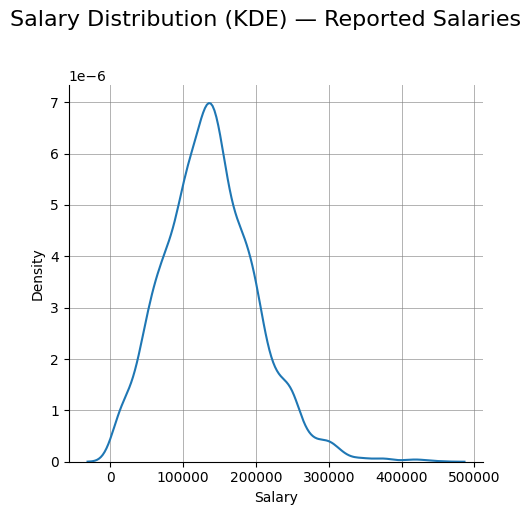

In [18]:
# Create the KDE plot
g = sns.displot(salaries, x="salary_in_usd", kind="kde")

# Add a meaningful title
g.fig.suptitle("Salary Distribution (KDE) — Reported Salaries", fontsize=16, y=1.02)

# Access the axes and customize
for ax in g.axes.flat:
    ax.set_xlabel("Salary")
    ax.set_ylabel("Density")
    ax.grid(True, alpha=0.6, linewidth=0.7, color="grey")

plt.tight_layout()
plt.show()

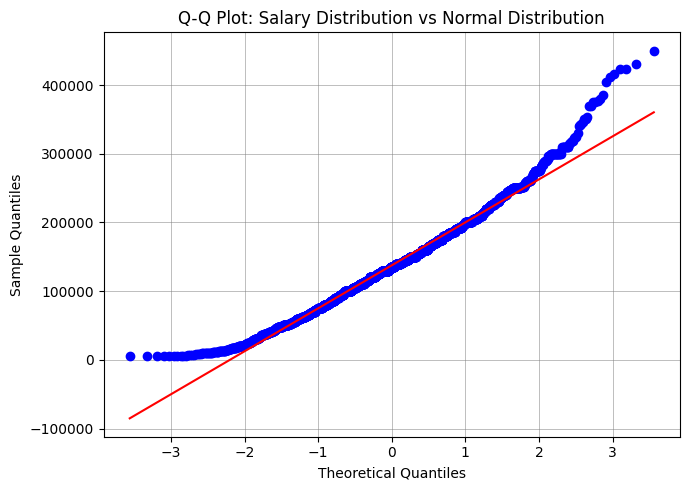

In [19]:
from scipy.stats import probplot

# Create Q-Q plot using seaborn style
fig, ax = plt.subplots(figsize=(7, 5))
probplot(salaries["salary_in_usd"], dist="norm", plot=ax)

# Customize the plot with seaborn styling
ax.set(
    title="Q-Q Plot: Salary Distribution vs Normal Distribution",
    xlabel="Theoretical Quantiles",
    ylabel="Sample Quantiles",
)
ax.grid(True, alpha=0.6, linewidth=0.6, color="grey")

plt.tight_layout()
plt.show()

In [20]:
from scipy.stats import shapiro

alpha = 0.05

stat, p = shapiro(salaries["salary_in_usd"])
print(f"p: {p:.3e} test stat: {round(stat, 4)}")

p: 5.132e-21 test stat: 0.9827


In [21]:
from scipy.stats import anderson

result = anderson(x=salaries["salary_in_usd"], dist="norm")

print("Anderson-Darling Test Results for Salary Distribution:")
print(f"{'='*50}")
print(f"Test Statistic: {result.statistic:.4f}")
print(f"Critical Values: {result.critical_values}")
print(f"Significance Levels (%): {result.significance_level}")
print(f"Fit Success: {result.fit_result.success}")

Anderson-Darling Test Results for Salary Distribution:
Test Statistic: 7.8391
Critical Values: [0.575 0.655 0.786 0.917 1.091]
Significance Levels (%): [15.  10.   5.   2.5  1. ]
Fit Success: True


In [22]:
from pingouin import normality

# Anderson-Darling test using pingouin
result_pg = normality(salaries["salary_in_usd"], method="normaltest")
display(result_pg)

,W,pval,normal
salary_in_usd,216.575884,9.357164e-48,False


In [23]:
url = "https://assets.datacamp.com/production/repositories/6639/datasets/271cc99d1f93fbfb2c3762f6517c58b22eb390ce/chick_weight.csv"
chicken_data = pd.read_csv(url, usecols=lambda col: not col.startswith("Unnamed"))
chicken_data.head()

,weight,Time,Chick,Diet
0,42,0,1,1
1,51,2,1,1
2,59,4,1,1
3,64,6,1,1
4,76,8,1,1


In [24]:
columns = chicken_data.columns.to_list()
for col in columns:
    print(f"The {col} column contains {len(chicken_data[col].unique())} unique values")

The weight column contains 212 unique values
The Time column contains 12 unique values
The Chick column contains 50 unique values
The Diet column contains 4 unique values


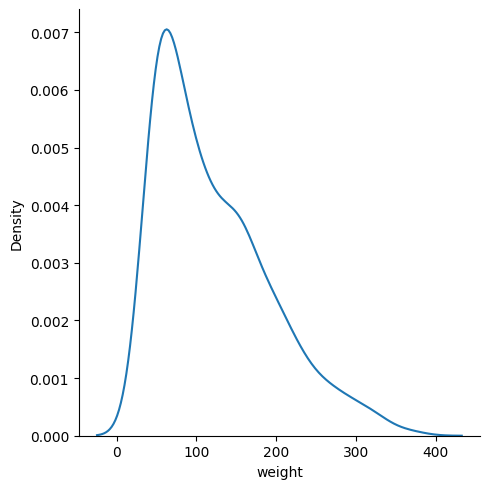

In [25]:
# Plot the distribution of the chickens' weight
sns.displot(data=chicken_data, x="weight", kind="kde")
plt.show()

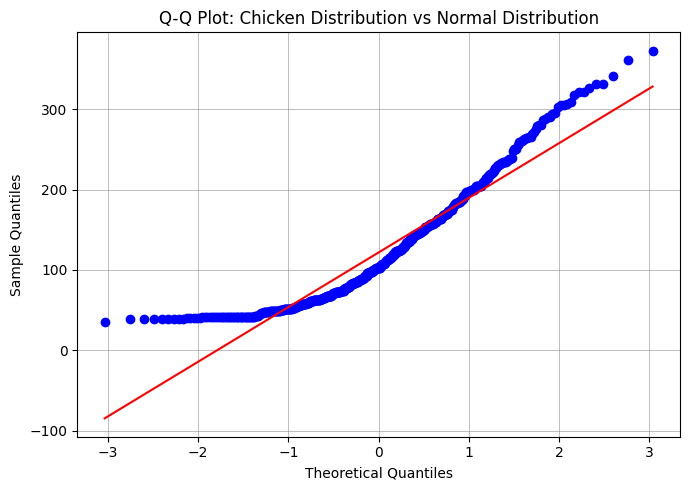

In [26]:
# Plot the qq plot of the chickens' weight
from scipy.stats import probplot

fig, ax = plt.subplots(figsize=(7, 5))

probplot(x=chicken_data["weight"], dist="norm", plot=ax)

ax.set(
    title="Q-Q Plot: Chicken Distribution vs Normal Distribution",
    xlabel="Theoretical Quantiles",
    ylabel="Sample Quantiles",
)
ax.grid(True, alpha=0.6, linewidth=0.6, color="grey")

plt.tight_layout()
plt.show()

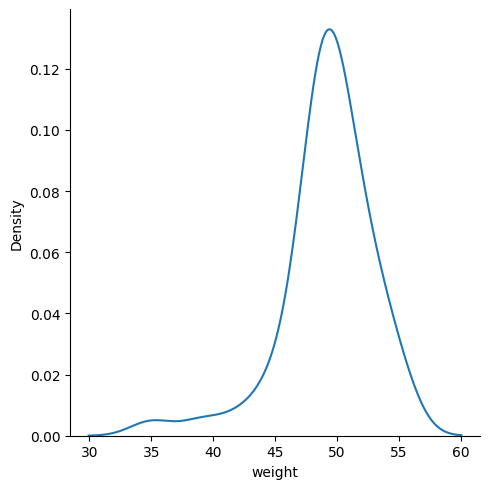

In [27]:
# Subset the data and plot the weight of the subset
subset_data = chicken_data[chicken_data["Time"] == 2]

sns.displot(data=subset_data, x="weight", kind="kde")
plt.show()

In [28]:
# Run a Shapiro-Wilk normality test on the weight column
from scipy.stats import shapiro

stat, p = shapiro(chicken_data["weight"])

print(f"p: {p:.3e} test stat: {round(stat, 4)}")

p: 3.874e-18 test stat: 0.9087


In [29]:
from scipy.stats import anderson

# Run the Anderson-Darling test
result = anderson(chicken_data["weight"], dist="norm")

print(f"Test statistic: {round(result.statistic, 4)}")
print(f"Significance Levels: {result.significance_level}")
print(f"Critical Values: {result.critical_values}")

Test statistic: 14.6868
Significance Levels: [15.  10.   5.   2.5  1. ]
Critical Values: [0.572 0.652 0.782 0.912 1.085]


In [30]:
from pingouin import normality

normality(data=chicken_data["weight"], method="normaltest")

,W,pval,normal
weight,69.337935,8.779275e-16,False


## Understanding Factorial Designs

In many experiments, an outcome is influenced by more than one factor. A factorial design is an efficient and powerful way to investigate these complex scenarios.

  * **Factors and Levels**: A **factor** is an independent variable (or categorical variable) that you are testing. A **level** is a specific value of that factor. For example, in an agricultural experiment, `Fertilizer_Type` could be a factor with two levels: `Organic` and `Synthetic`. `Light_Condition` could be a second factor with two levels: `Full Sunlight` and `Partial Shade`. An experiment with these two factors would be a **2x2 factorial design**, resulting in 2 x 2 = 4 unique experimental conditions.

  * **Key Advantages**:

    1.  **Efficiency**: It allows you to study multiple factors and their effects in a single experiment, which is more economical than running separate single-factor experiments.
    2.  **Interaction Effects**: Most importantly, it is the only design that allows you to discover **interactions** between factors.

### Main Effects vs. Interaction Effects

A factorial design allows you to measure two types of effects:

  * **Main Effect**: The overall effect of a single factor on the response variable, averaged across the levels of all other factors. For example, "What is the overall effect of `Fertilizer_Type` on plant growth, regardless of the `Light_Condition`?"

  * **Interaction Effect**: An interaction occurs when the effect of one factor on the response variable **depends on the level of another factor**. This is a critical concept. For example, an interaction exists if organic fertilizer works best in full sunlight, but synthetic fertilizer works best in partial shade. If a significant interaction is present, the factors do not work independently, and interpreting the main effects in isolation can be misleading.

### Implementation and Analysis in Python

Analyzing a factorial design involves first visualizing the results and then performing a statistical test.

#### 1. Visualizing Interactions

A **heatmap** is an excellent tool for visualizing the results of a factorial experiment and spotting potential interactions. The first step is to organize the data into a grid of mean outcomes for each combination of factor levels. This is easily done with a `pandas.pivot_table`.

  * **How to Interpret the Heatmap**: You look for a "non-parallel" pattern. If the color pattern in one row is different from the pattern in another row, it suggests an interaction. For example, if for `Full Sunlight` the `Organic` cell is "hotter" (higher value) than `Synthetic`, but for `Partial Shade` the `Synthetic` cell is hotter, this reversal indicates a strong interaction.

#### 2. Statistical Analysis (ANOVA)

The standard statistical method for analyzing a factorial design is a **two-way Analysis of Variance (ANOVA)**. The model formula in `statsmodels` is structured to test for both main effects and the interaction effect:

`response ~ factor1 + factor2 + factor1:factor2`

The p-value for the `factor1:factor2` interaction term is the key result. A significant p-value confirms that the effect of one factor is dependent on the level of the other.

### A Complete Example

**Scenario**: We want to study the effect of `Light_Condition` ('High', 'Low') and `Nutrient_Type` ('A', 'B') on plant `Growth_cm`.

```python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Create a generic, reproducible dataset for a 2x2 factorial design
# We will intentionally create an interaction effect.
np.random.seed(42)
data = {
    'Light_Condition': np.random.choice(['High', 'Low'], 200),
    'Nutrient_Type': np.random.choice(['A', 'B'], 200)
}
df = pd.DataFrame(data)

# Define the effects
base_growth = 20
# Main effects
light_effect = {'High': 5, 'Low': -5}
nutrient_effect = {'A': 2, 'B': -2}
# Interaction effect: Nutrient A is MUCH better in High light
interaction_effect = {('High', 'A'): 8, ('High', 'B'): 0, ('Low', 'A'): 0, ('Low', 'B'): 3}

df['Growth_cm'] = base_growth + \
                  df['Light_Condition'].map(light_effect) + \
                  df['Nutrient_Type'].map(nutrient_effect) + \
                  df.apply(lambda row: interaction_effect[(row['Light_Condition'], row['Nutrient_Type'])], axis=1) + \
                  np.random.normal(0, 2, 200)

# 2. Organize the data to visualize the interaction
# Create a pivot table of the mean growth for each condition
pivot = pd.pivot_table(df, values='Growth_cm', index='Light_Condition',
                       columns='Nutrient_Type', aggfunc='mean')

print(pivot)

# 3. Visualize the interaction with a heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(pivot, annot=True, cmap='viridis', fmt='.2f', ax=ax, cbar_kws={'label': 'Mean Growth (cm)'})
ax.set_title("Interaction between Light Condition and Nutrient Type")
ax.set_xlabel("Nutrient Type")
ax.set_ylabel("Light Condition")
plt.tight_layout()
plt.show()
```

**Interpretation of the Heatmap**:
The heatmap visually reveals the strong interaction effect we created. In the 'High' light condition, `Nutrient_Type` 'A' is clearly superior to 'B' (34.90 vs. 22.99). However, in the 'Low' light condition, this effect reverses, and 'B' is slightly better than 'A' (16.03 vs. 13.06). Because the effect of `Nutrient_Type` is different depending on the `Light_Condition`, we can conclude that a significant interaction is present.

In [ ]:
url = "https://assets.datacamp.com/production/repositories/6639/datasets/7cb2f98d6252b3fccdb870bc4f05815d4df71c20/marketing_data.feather"
marketing_data = pd.read_feather(url)
marketing_data.head()

,Messaging_Style,Time_of_Day,Click_Through_Rate,Conversions
0,Casual,Morning,0.640465,500
1,Formal,Evening,0.698533,598
2,Casual,Morning,0.257834,234
3,Casual,Evening,0.922971,602
4,Casual,Morning,0.476893,314


In [37]:
# Create a pivot table with 'Messaging_Style' as the index and 'Time_of_Day' as the columns, computing the mean of Conversions.
marketing_pivot = marketing_data.pivot_table(
    values="Conversions",
    index="Messaging_Style",
    columns="Time_of_Day",
    aggfunc="mean",
)

display(marketing_pivot)

Time_of_Day,Evening,Morning
Messaging_Style,,
Casual,402.329004,401.133891
Formal,432.913043,411.096000


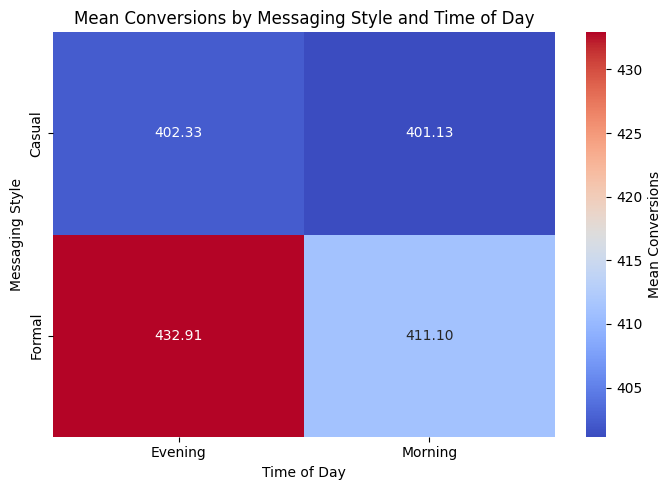

In [45]:
# Visualize interactions between Messaging_Style and Time_of_Day with respect to conversions by creating an annotated cool-warm heatmap of marketing_pivot.
fig, ax = plt.subplots(figsize=(7, 5))

sns.heatmap(
    marketing_pivot,
    cmap="coolwarm",
    fmt=".2f",
    ax=ax,
    annot=True,
    cbar_kws={"label": "Mean Conversions"},
)
ax.set(
    xlabel="Time of Day",
    ylabel="Messaging Style",
    title="Mean Conversions by Messaging Style and Time of Day",
)

plt.tight_layout()
plt.show()

### The Problem: Controlling Unwanted Variance

In many experiments, we know that certain baseline characteristics of our subjects can significantly influence the outcome, regardless of the treatment they receive. For example, when testing new training programs, an athlete's initial fitness level will likely have a large impact on their muscle gain.

This pre-existing variability among subjects can act as "noise" in our experiment. If this noise is large, it can obscure the true, potentially smaller, effect of the treatments, making it difficult to achieve statistically significant results. A randomized block design is a powerful technique to address this problem.


### The Solution: Randomized Block Design

The core idea is to isolate a known source of variability and remove its effect from the analysis of the treatment.

  * **Blocking**: First, you group subjects into homogeneous **blocks** based on a key covariate that you believe will affect the outcome. For example, you could block athletes by `Initial_Fitness_Level` (`Beginner`, `Intermediate`, `Advanced`). All subjects within a block should be as similar as possible with respect to this variable.

  * **Randomization within Blocks**: Second, you perform a separate randomization **within each block** to assign subjects to the different treatment groups. This ensures that each treatment is tested on a balanced set of subjects from each fitness level.

The advantage of this design is that it allows you to statistically control for the variability *between* the blocks, providing a clearer and more precise estimate of the treatment's true effect.

### Implementation and Analysis in Python

Let's walk through an example of setting up and analyzing a randomized block experiment.

**Scenario**: We want to test three different training `Treatments` ('Cardio', 'Mixed', 'Strength Training') on athlete `Muscle_Gain_kg`. We know that `Initial_Fitness_Level` is a major factor, so we use it as our blocking variable.

```python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# 1. Create a generic, reproducible dataset
np.random.seed(42)
fitness_levels = ['Beginner', 'Intermediate', 'Advanced']
df = pd.DataFrame({
    'Initial_Fitness_Level': np.random.choice(fitness_levels, 300, p=[0.3, 0.4, 0.3]),
    'Athlete_ID': np.arange(300)
})

# Simulate a base muscle gain dependent on the blocking variable
fitness_effect = {'Beginner': 5.0, 'Intermediate': 4.5, 'Advanced': 4.0}
df['Muscle_Gain_kg'] = df['Initial_Fitness_Level'].map(fitness_effect) + np.random.normal(0, 1, 300)

# 2. Implement Randomized Block Assignment
# For each block (fitness level), we will shuffle and assign the three treatments.
treatments = ['Cardio', 'Mixed', 'Strength Training']
# Ensure each block has a size divisible by the number of treatments
df_blocked = df.groupby('Initial_Fitness_Level').apply(
    lambda x: x.assign(Treatment=np.random.permutation(treatments * (len(x) // len(treatments))))
).reset_index(drop=True)

# 3. Visualize the Results
# Visualize treatment effects within each block
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='Initial_Fitness_Level', y='Muscle_Gain_kg', hue='Treatment', data=df_blocked, ax=ax)
ax.set_title('Treatment Effect on Muscle Gain within each Fitness Block')
plt.show()
```

The boxplot allows us to visually inspect the effect of the different treatments for each fitness level separately.

#### Statistical Analysis

We can now perform two separate ANOVA tests to answer two different questions.

**1. Is there a significant effect of the blocking variable?**
This test validates our decision to use `Initial_Fitness_Level` as a block. If there is no significant difference in muscle gain between the levels, then blocking was not necessary.

```python
# ANOVA between the blocks
F_stat_blocks, p_val_blocks = f_oneway(
    df_blocked[df_blocked['Initial_Fitness_Level'] == "Advanced"]['Muscle_Gain_kg'],
    df_blocked[df_blocked['Initial_Fitness_Level'] == "Beginner"]['Muscle_Gain_kg'],
    df_blocked[df_blocked['Initial_Fitness_Level'] == "Intermediate"]['Muscle_Gain_kg']
)

print(f"P-value for difference between fitness levels: {p_val_blocks:.4f}")
```

A significant p-value here confirms that the blocking variable has a strong effect on the outcome and that the blocking design was a good choice.

**2. Is there a significant treatment effect *within* the blocks?**
This is the primary question of our experiment. We can perform an ANOVA within each block to see if the treatments had a differential effect.

```python
# ANOVA within each block
within_block_anova = df_blocked.groupby('Initial_Fitness_Level').apply(
    lambda x: f_oneway(
        x[x['Treatment'] == 'Cardio']['Muscle_Gain_kg'],
        x[x['Treatment'] == 'Mixed']['Muscle_Gain_kg'],
        x[x['Treatment'] == 'Strength Training']['Muscle_Gain_kg']
    )
)

# The second element of each result is the p-value
print(within_block_anova.apply(lambda x: x[1]))
```

By looking at the p-values for each block, we can assess if the treatments had a significant effect for beginners, intermediates, or advanced athletes, having controlled for the initial differences between these groups.

In [48]:
url = "https://assets.datacamp.com/production/repositories/6639/datasets/33a580fb6b6b303ee02c4ce225a8a9c19d275915/hr_wellness.csv"
productivity = pd.read_csv(url, usecols=lambda col: not col.startswith("Unnamed"))
productivity.head()

,Department,Wellness_Program_Status
0,Marketing,Enrolled
1,Sales,Enrolled
2,Marketing,Not Enrolled
3,Marketing,Not Enrolled
4,Sales,Enrolled


### Implementing a randomized block design
The manufacturing firm you worked with earlier is still interested in conducting some experiments on worker productivity. Previously, the two blocks were set randomly. While this can work, it can be better to group subjects based on similar characteristics.

The same employees are again loaded but this time in a DataFrame called `productivity` including 1200 other colleagues. It also includes a worker `'productivity_score'` column based on units produced per hour. This column was binned into three groups to generate blocks based on similar productivity values. The firm would like to apply a new incentive program with three options (`'Bonus'`, `'Profit Sharing'` and `'Work from Home'`) throughout the firm with treatment applied randomly.